In [1]:
# import a csv

import pandas as pd
from pandas import read_csv

url = "../Health_heart_experimental.csv"
dfBase = read_csv(url, sep=',')

print(dfBase.shape)
print("\n")
print(dfBase.info())
#print("\n")
#print(dfBase.head(5))
#print("\n")
#print(dfBase.describe())

(71760, 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71760 entries, 0 to 71759
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  71760 non-null  int64  
 1   age         71760 non-null  int64  
 2   sex         71760 non-null  int64  
 3   SysBP       71760 non-null  int64  
 4   DiaBP       71760 non-null  int64  
 5   HR          71760 non-null  int64  
 6   weightKg    71760 non-null  int64  
 7   heightCm    71760 non-null  int64  
 8   BMI         71760 non-null  float64
 9   indication  71760 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 5.5 MB
None


In [2]:
# Limpiamos los datos
import numpy as np
import random

cols = ['age', 'sex', 'SysBP', 'DiaBP', 'HR', 'weightKg', 'heightCm', 'BMI', 'indication']
df = dfBase[cols].copy()

### delete empty values because those are no valid


# create categories of BMI
# 0, Underweight < 18.5 | 1, Normal Weight = 18.5 - 24.9 | 2, Overweight = 25 - 29.9 | 3, Obesity = 30 - 34.9 | 4, Extreme Obesity > 34.9
# ??? poner en documento
def process_bmi_category(n):
    if n < 18.5: return 0
    if n >= 18.5 and n < 25: return 1
    if n >= 25 and n < 30: return 2
    if n >= 30 and n < 35: return 3
    if n >= 35: return 4
    return -1

df['bmiCategory'] = df['BMI'].apply(lambda n: process_bmi_category(n))

# Pregnancy
def create_random_pregnancy(el):
    if el['sex'] == 1: return 0
    resp = random.randint(0, 99)
    res = True if resp == 1 else False # 1% probability of pregnancy
    if el['age'] > 13 and el['age'] < 40 and res : return 1
    return 0

df['pregnant'] = df[['sex', 'age']].apply(lambda el: create_random_pregnancy(el), axis=1)

# Breastfeeding
def create_random_breastfeeding(el):
    if el['sex'] == 1: return 0
    resp = random.randint(0, 99)
    res = True if resp == 1 else False # 1% probability of breastfeeding
    if el['age'] > 13 and el['age'] < 40 and res : return 1
    return 0

df['breastfeeding'] = df[['sex', 'age']].apply(lambda el: create_random_breastfeeding(el), axis=1)


# Exercise
def create_random_exercise(el):
    if el['pregnant'] == 1: return 0
    resp = random.randint(0, 99)
    res = True if resp <= 15 else False # 15% probability of exercise
    if el['age'] > 13 and el['age'] < 40 and res : return 1
    return 0

df['exercise'] = df[['pregnant', 'age']].apply(lambda el: create_random_exercise(el), axis=1)


# Water amount
def calculate_water_amount(el):
    quantity_ml = el['weightKg'] * 35
    if el['pregnant'] == 1: quantity_ml += 500
    if el['breastfeeding'] == 1: quantity_ml += 750
    if el['pregnant'] == 1: quantity_ml += 500
    return quantity_ml

df['waterAmount'] = df[['weightKg', 'pregnant', 'breastfeeding', 'exercise']].apply(lambda el: calculate_water_amount(el), axis=1)


# water glasses
def calculate_water_amount(el):
    quantity = el['waterAmount'] / 250
    if quantity < 8: return 8
    return round(quantity)

df['waterGlasses'] = df[['waterAmount']].apply(lambda el: calculate_water_amount(el), axis=1)


#print(df.isin([-200]).any().any())
#print("\n")
#print( df.shape)
#print("\n")
#print(df.info())
print("\n")
print(df.head(5))
# print("\n")
#print(df.describe())



   age  sex  SysBP  DiaBP   HR  weightKg  heightCm   BMI  indication  \
0   64    1    141     96  128        69       147  32.0           1   
1   21    1    109    100  106        48       150  21.0           0   
2   30    0    112     73  126        69       183  21.0           0   
3   35    1    106     90  130        45       149  20.0           0   
4   39    0    140     90  112        92       166  33.0           1   

   bmiCategory  pregnant  breastfeeding  exercise  waterAmount  waterGlasses  
0            3         0              0         0         2415            10  
1            1         0              0         0         1680             8  
2            1         0              0         1         2415            10  
3            1         0              0         0         1575             8  
4            3         0              0         0         3220            13  


In [3]:
# selected cols

df_processed = df.copy()

# all fields
# cols = ['age', 'sex', 'SysBP', 'DiaBP', 'HR', 'weightKg', 'heightCm', 'BMI', 'indication', 'bmiCategory', 'pregnant', 'breastfeeding', 'exercise', 'waterAmount', 'waterGlasses']

# all selectable
# cols = ['age', 'sex', 'weightKg', 'heightCm', 'bmiCategory', 'pregnant', 'breastfeeding', 'exercise', 'waterAmount', 'waterGlasses']

# selected
cols = ['age', 'sex', 'weightKg', 'heightCm', 'bmiCategory', 'pregnant', 'breastfeeding', 'exercise', 'waterGlasses']
df = df[cols].copy()


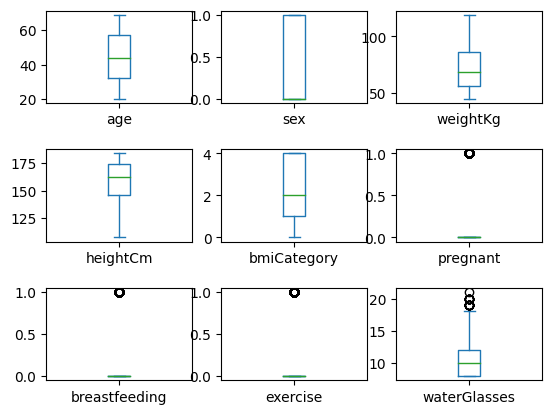

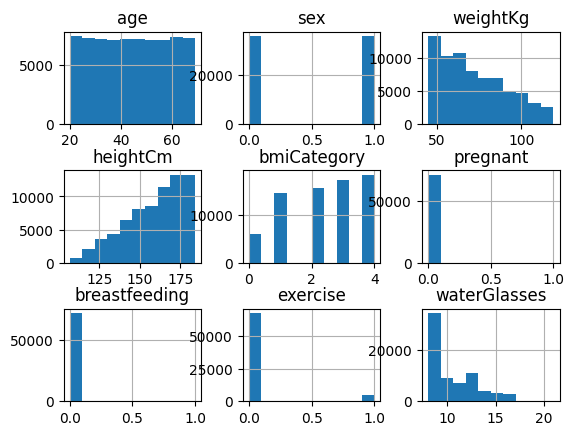

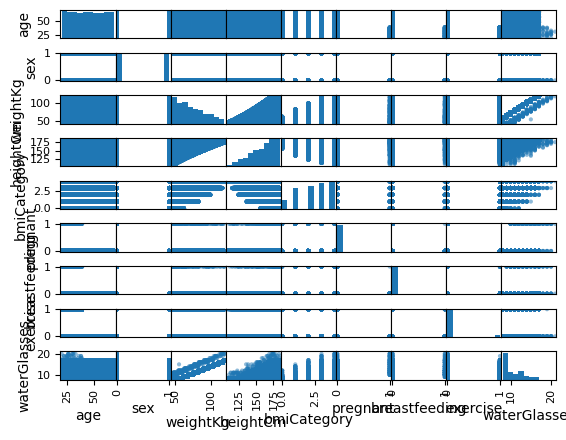

In [4]:
# Load libraries from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt


# gráficos univariable:
# diagramas de caja (box and whisker)
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.subplots_adjust(hspace=0.5) 
pyplot.show()

# histogramas
df.hist()
pyplot.subplots_adjust(hspace=0.5) 
pyplot.show()

# gráficos multivariable
# matriz de dispersión
scatter_matrix(df)
pyplot.subplots_adjust(hspace=0.5) 
pyplot.show()

In [5]:
# division de datos

from sklearn.model_selection import train_test_split
array = df.values

# cols = ['age', 'sex', 'weightKg', 'heightCm', 'bmiCategory', 'pregnant', 'breastfeeding', 'exercise', 'waterGlasses']
# todos
X = array[:,[0,1,2,3,4,5,6,7]]
# parecidos
y = array[:,8]

print(X)
print("\n")

print(y)
print("\n")

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


[[ 64   1  69 ...   0   0   0]
 [ 21   1  48 ...   0   0   0]
 [ 30   0  69 ...   0   0   1]
 ...
 [ 24   1  57 ...   0   0   0]
 [ 42   1 115 ...   0   0   0]
 [ 49   1  81 ...   0   0   0]]


[10  8 10 ...  8 16 11]




# regresión lineal múltiple NO NEURONAL

In [6]:
# predicción simple solo para test

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)

#predictedNO2 = regr.predict([[2.2,1351,87,9.5,960,129,1079,101]])
predictedNO2 = regr.predict([X[5,:]])
#print(y[5]) # valor esperado ???

print(predictedNO2)


[-1.27807374e-04  8.79706760e-04  1.36580109e-01 -1.22947471e-02
 -1.81545231e-01  3.73752316e+00  2.75435157e+00 -9.61694107e-04]
[8.00326628]


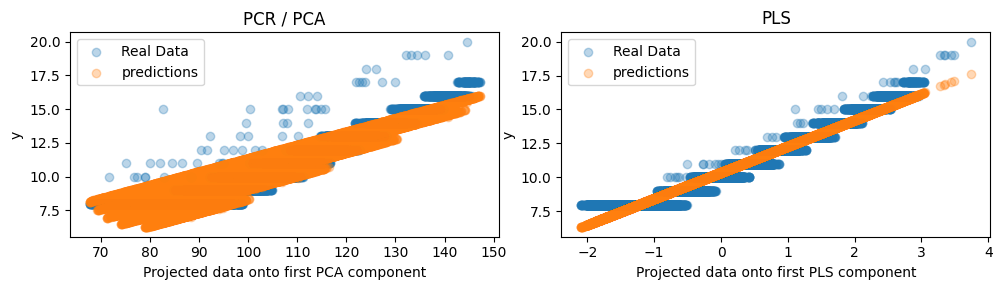

In [7]:
# regresión lineal NO NEURONAL

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="Real Data")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()

axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="Real Data")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()

plt.tight_layout()
plt.show()


In [8]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

pca_2 = make_pipeline(PCA(n_components=2), LinearRegression())
pca_2.fit(X_train, y_train)
print(f"PCR r-squared with 2 components {pca_2.score(X_test, y_test):.3f}")

PCR r-squared 0.916
PLS r-squared 0.951
PCR r-squared with 2 components 0.765
